# PyTASER Examples


The examples given below use electronic structure information from the Materials Project database. They require an API key that you can get from https://materialsproject.org/open



As the database is built from density functional theory calculations using a semi-local exchange-correlation functional, the band gaps are underestimated, so we apply a scissors operator to recover the experimental bandgap in each case. This is necessary to directly compared predicted and modelled spectra.

## Setup

In [1]:
from pytaser import generator, plotter
%pylab inline

key = 'w02ir9NJsWnyZBID'  # insert your own Materias Project key
temp = 298 # temperature in Kelvin
conc = 1e18 # carrier concentration per cm3 

/opt/anaconda3/lib/python3.8/site-packages/pymatgen/analysis/phase_diagram.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Populating the interactive namespace from numpy and matplotlib


## GaAs

In [2]:
bandgap = 1.5 # eV

GaAs_generator = generator.TASGenerator.from_mpid("mp-2534", bandgap, api_key=key)
GaAs_tas = GaAs_generator.generate_tas(temp, conc)

GaAs_plotter = plotter.TASPlotter(GaAs_tas, bandgap, material_name="GaAs", temp=temp, conc=conc)

/opt/anaconda3/lib/python3.8/site-packages/pymatgen/ext/matproj.py:182: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/pymatgen/electronic_structure/dos.py:1371: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp((E - fermi) / (_cd("Boltzmann constant in eV/K") * T)))
/opt/anaconda3/lib/python3.8/site-packages/pytaser/plotter.py:8: RuntimeWarning: divide by zero encountered in true_divide
  wavelength = ((scpc.h * scpc.c) / (ev * scpc.electron_volt)) * 10e8


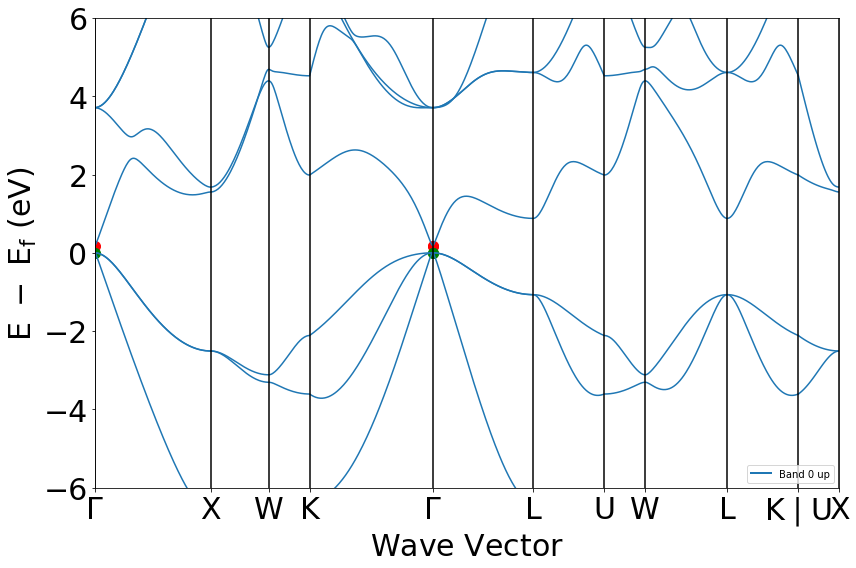

In [3]:
#Band structure read from pymatgen 
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
a = MPRester(key)
bs = a.get_bandstructure_by_material_id("mp-2534")

from pymatgen.electronic_structure.plotter import BSPlotter
plt = BSPlotter(bs).get_plot(vbm_cbm_marker=True,ylim=[-6,+6])

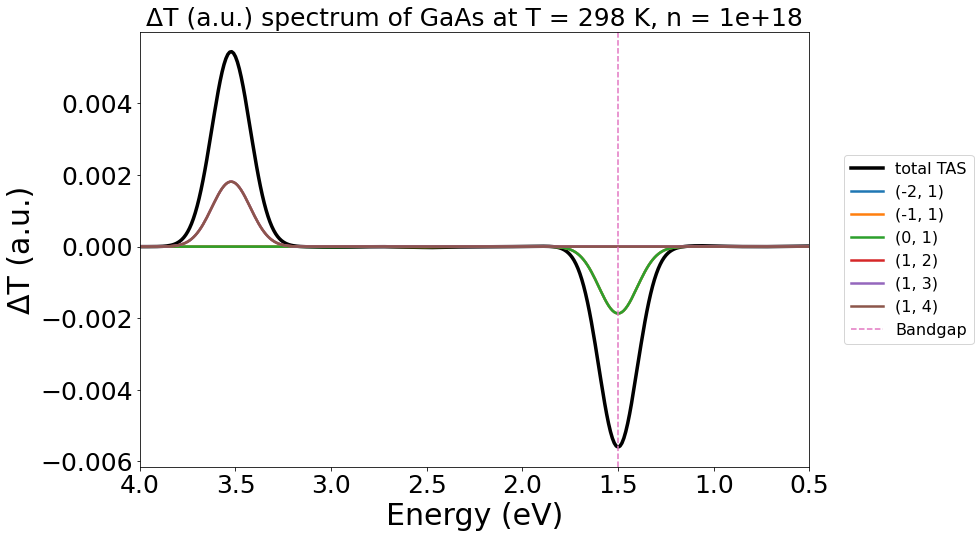

In [4]:
# Energy plot (reverse axis for better comparison)
plot2_gaas = GaAs_plotter.get_plot(
    xaxis="energy", transition_cutoff=0.03, xmin=0.5, xmax=4, yaxis="tas")
plot2_gaas.gca().invert_xaxis()

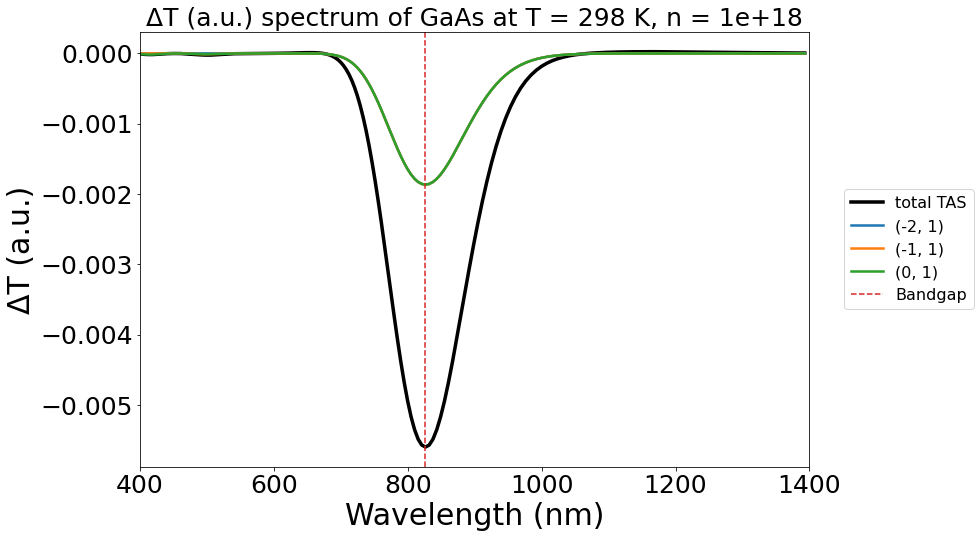

In [5]:
# Wavelength plot
plot_gaas = GaAs_plotter.get_plot(
   xaxis="wavelength", transition_cutoff=0.03, xmin=400, xmax=1400, yaxis="tas")